# Ансамблевые методы

1. Использовать датасет `telecom_churn.csv`
2. Обучить LogisticRegression. Использовать в качестве `baseline`.
3. Обучить на этом датасете все три вида ансамблей, использованных в этом ноутбуке. Сравнить с baseline
4. Использовать PCA для понижения размерности, или использовать статистическим методом отбор признаков SelectKBest. Затем обучить LogisticRegression в качестве `baseline`, и обучить все три вида ансамблей, рассмотренных в этом ноутбуке. 
5. Сравнить результаты между собой до понижения размерности или отбора признаков, так и после них.


## Preparing data 

In [337]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split # разбиение данных на тренировочные и тестовые

from sklearn.compose import ColumnTransformer # преобразование столбцов
from sklearn.preprocessing import OneHotEncoder # кодирование категориальных переменных
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler # нормализация и масштабирование данных

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import StackingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb

from sklearn.model_selection import cross_val_score # кроссвалидация
from sklearn.model_selection import GridSearchCV # подбор гиперпараметров с кроссвалидацией


from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

import gc

sns.set()
%matplotlib inline

import sys
# np.set_printoptions(suppress=True)
# np.set_printoptions(threshold=sys.maxsize)
# np.set_printoptions(precision=3)

DISPLAY_MAX_ROWS = 20 #20
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)
pd.set_option('display.max_column', 100) # None)
plt.style.use('seaborn-whitegrid')


# plt.rcParams["figure.figsize"] = (20, 15)

import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import make_pipeline

In [338]:
dataset = pd.read_csv('../data/telecom_churn.csv')
dataset

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [290]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [291]:
dataset.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [292]:
# object_columns = ["State", "International plan", "Voice mail plan"]

In [339]:
# Categorial features preproccesing
dataset['International plan'] = dataset['International plan'].apply(lambda x: True if x == 'Yes' else False)
dataset['Voice mail plan'] = dataset['Voice mail plan'].apply(lambda x: True if x == 'Yes' else False)
dataset = pd.get_dummies(dataset, columns=['State'])

In [340]:
y = dataset['Churn'].values # target
X = dataset.loc[:, dataset.columns!='Churn'].values
X.shape, y.shape

((3333, 69), (3333,))

In [341]:
# разбиение  на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [342]:
# тут результаты всех методов
score_results = pd.DataFrame(columns=('accuracy', 'std'))

In [343]:
def add_score(accuracy, std, methodname):
    global score_results
    new_line = pd.Series({'accuracy': accuracy, 'std': std}, name=methodname)
    new_row = pd.DataFrame([new_line], columns=score_results.columns)
    # append new line to dataframe
    score_results = pd.concat([score_results, new_row])

In [344]:
def show_scores(classifier, methodname):
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=classifier.classes_)
    disp.plot()
    plt.show()

    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    accuracy = round(accuracies.mean()*100, 2)
    std = round(accuracies.std()*100, 2)
    print("Accuracy: {:.2f} %".format(accuracy))
    print("Standard Deviation: {:.2f} %".format(std))

    add_score(accuracy, std, methodname)

## Base Line

[[565  14]
 [ 80   8]]


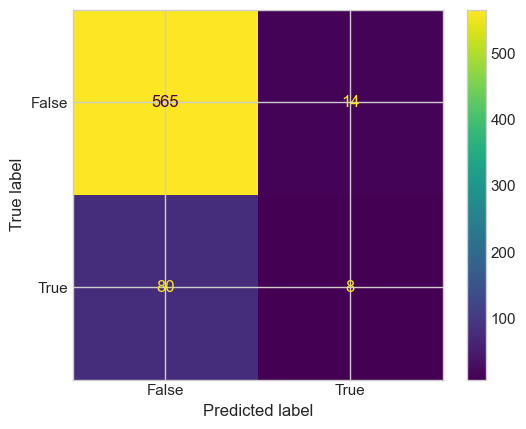

Accuracy: 85.45 %
Standard Deviation: 1.01 %


In [345]:
base_estimator = LogisticRegression()
base_estimator.fit(X_train, y_train)
show_scores(classifier=base_estimator, methodname="LogisticRegression")

## Ensembles

### Stacking

In [346]:
# stacking
estimators = [('lr', LogisticRegression()), ('dt', DecisionTreeClassifier())]
classifier = StackingClassifier(estimators=estimators, final_estimator=SVC())
classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=SVC())

[[530  49]
 [ 19  69]]


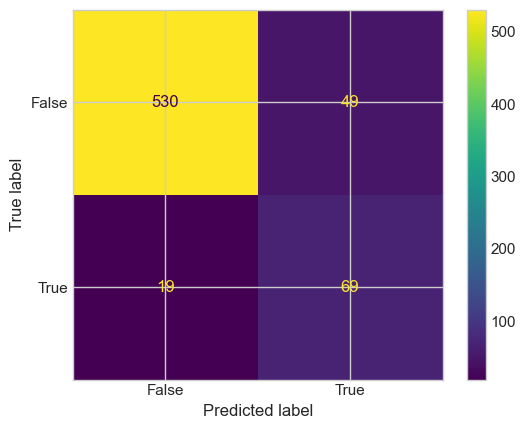

Accuracy: 90.44 %
Standard Deviation: 1.51 %


In [347]:
show_scores(classifier, "StackingClassifier")

### Bagging

In [ ]:
classifier = BaggingClassifier(estimator=LogisticRegression())
classifier.fit(X_train, y_train)

BaggingClassifier(estimator=LogisticRegression())

[[530  49]
 [ 19  69]]


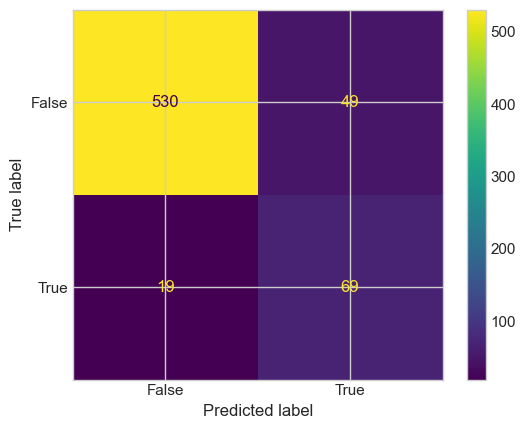

Accuracy: 90.59 %
Standard Deviation: 1.46 %


In [348]:
show_scores(classifier, "BaggingClassifier")

In [349]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

[[575   4]
 [ 27  61]]


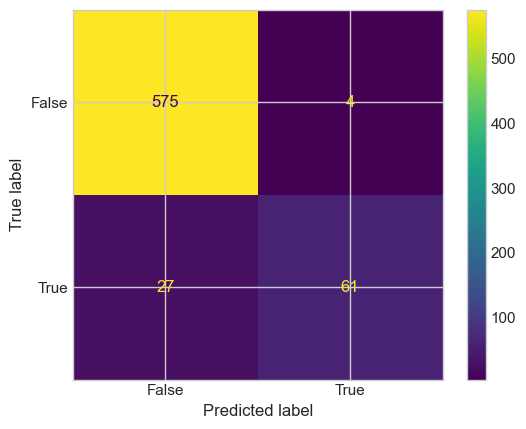

Accuracy: 94.04 %
Standard Deviation: 0.83 %


In [350]:
show_scores(classifier, "RandomForestClassifier")

### Boosting

#### Ada Boosting

In [351]:
classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=12)
classifier.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=100, random_state=12)

[[560  19]
 [ 27  61]]


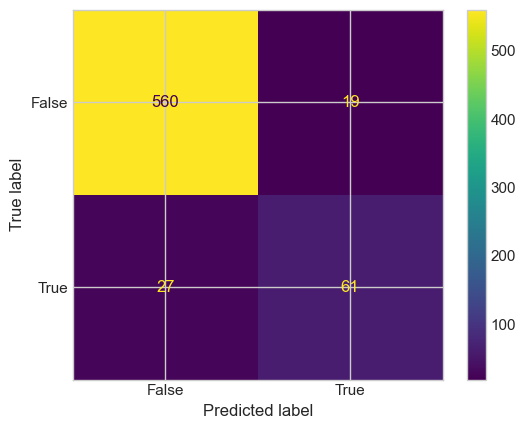

Accuracy: 92.69 %
Standard Deviation: 1.05 %


In [352]:
show_scores(classifier, "AdaBoostClassifier")

#### Gradient Boosting

In [353]:
classifier = GradientBoostingClassifier(max_depth=2, n_estimators=150,
                                      random_state=12, learning_rate=1)
classifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=2, n_estimators=150,
                           random_state=12)

[[557  22]
 [ 28  60]]


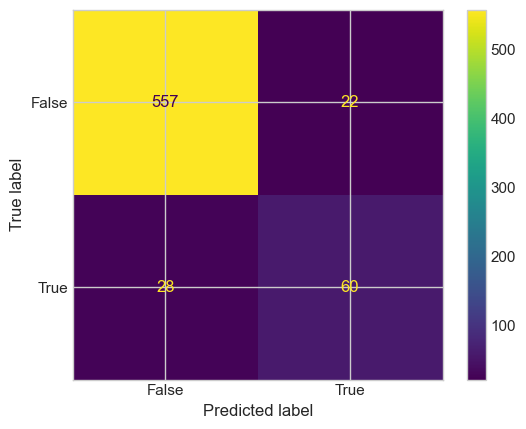

Accuracy: 91.30 %
Standard Deviation: 2.24 %


In [354]:
show_scores(classifier, "GradientBoostingClassifier")

[XGBoost, LightGBM или CatBoost - какой алгоритм бустинга следует использовать?](https://vk.com/@coeusds-xgboost-lightgbm-ili-catboost-kakoi-algoritm-bustinga-sled)

Существует несколько различных вариаций GBDT – это XGBoost, LightGBM и CatBoost. 

Они отличаются друг от друга по нескольким критериям – симметричность деревьев, метод разбиения объектов, обработка категориальных признаков, интерпретация пропущенных значений, обработка текстовых признаков. 

* В CatBoost деревья симметричные на каждом уровне, в двух других алгоритмах – ассиметричные. Таким образом, в LightGBM алгоритме деревья растут по листьям, горизонтально (leaf-wise growth), а в XGBoost деревья растут по уровням, вертикально (level-wise growth). 

* В CatBoost используется жадный алгоритм разбиения наблюдений, в LightGBM используется Gradient-based One-Side Sampling, основанный на значениях градиента для наблюдений, а в XGBoost разбиение работает по предварительной сортировке значений признаков. 

* На вход CatBoost могут подаваться категориальные признаки, LightGBM может принимать их на вход только в числовом формате, однако можно в порядковом виде. А XGBoost не может работать с порядковыми данными, категориальные признаки должны подаваться только после кодирования.

In [355]:
score_results

,accuracy,std
LogisticRegression,85.45,1.01
StackingClassifier,90.44,1.51
BaggingClassifier,90.59,1.46
RandomForestClassifier,94.04,0.83
AdaBoostClassifier,92.69,1.05
GradientBoostingClassifier,91.30,2.24


## Ensembles + PCA(понижаем размерность)

1